# Multi-Start Hill-Climbing Algorithm

The Hill Climbing algorithm is a loop which creates an ordered list that represents the order of colours. Through each iteration of the loop a new order is created and compared to the previous, if better this new order is then a replacement. This loop continues until the evaluated accuracy is equal to or less than the accuracy that was parsed into the main method, or until the loop has iterated too many times which results in the best order being used.

### Read the File

This method reads the file that was parsed into the program and returns the list of colours and the count of colours that exist.

In [1]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

### Plot Colours in Strip

This method is used to convert a list of colours and an order of those colours into a colour strip.

In [2]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colours(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluation Functions

The euclid method compares two colours together to find the distance between them. The evaluate method measures the quality of an order list that its been provided with. The evaluation makes use of the euclid method.

In [3]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### The Algorithm

The getNewOrder method serves the purpose of returning a new version of the colour order list. This method changes the order by swapping the elements of the current order from random indexes.

In [4]:
import random

def getNewOrder(current):# generates a new order
    okay = 'false'# variable that acts like a boolean, used for the loop exit
    while okay == 'false':# while the boolean is false
        rInt1 = random.randint(0,ncolours-1)# random integer
        rInt2 = random.randint(0,ncolours-1)# random integer
        if rInt1 != rInt2:# if the random integers are not equal (which is what we want)
            okay = 'true'# set the boolean to true
            
    temp = current[rInt1]# have a temp variable hold the element in current at the random index
    current[rInt1] = current[rInt2]# set the element at the random index to the other random element
    current[rInt2] = temp# set the element to the temporarily saved value
        
    return current

Creates the default ordering of colours which is presented as [0, 1, 2, 3, 4, 5, 6, 7, ..., n].

In [5]:
def getDefaultOrder():# generates a default order where the values climb from 0 to the number of colours
    defaultOrder = []
    for i in range(ncolours):# loops for the number of values in ncolours
        defaultOrder.append(i)# adds the value to the array
    return defaultOrder

Main method is called once for each file. This method is the main section of the program as it does the main algorithm work. It gets a solution from the defaultOrder method and then begins a loop which serves the purpose of finding the most accurate order. If the loop generates an order that is better than the parssed accuracy then it breaks the loop. If the loop iterates for more than the parsed maxIterations then it breaks the loop and the best found colour order is used.

In [6]:
def main(colours,accuracy,maxRepetitions):
    repetitions = 1# variable hold the number of times this program loops through orders to find the best
    # STEP 1: select current solution
    currentSolution = getDefaultOrder()# set the current solution to the default order

    accurate = 'false'# variable used for running and exiting the loop
    while accurate == 'false':# while the variable is false
        repetitions = repetitions + 1# increment the repetitions variables

        # STEP 2: evaluate the current order
        evalOriginal = evaluate(colours, currentSolution)# evaluate the original order

        # STEP 3: select new solution
        newSolution = getNewOrder(currentSolution)# get a new order from the method

        # STEP 4: evaluate the new solution
        evalNewer = evaluate(colours, newSolution)

        # STEP 5: is the new solution better than the old
        if evalNewer < evalOriginal:# if the new evaluation is less than the older one
            currentSolution = newSolution# set the old solution to the better one

        if evalOriginal <= accuracy:# if the evaluation is less than the accuracy
            accurate = 'true'# set variable to true to allow the loop to exit
            
        if repetitions >= maxRepetitions:# if the program takes too long to ouput the solution
            accurate = 'true'# set variable to true to allow the loop to exit
            
    print('Repetitions: ', repetitions)
    print('Evaluation:',evaluate(colours,order))
    plot_colours(colours, currentSolution)# plot the colours on the colour strip using the method

### Iterate Through Seperate Files

 This section of code loads a file for the program one at a time. It initialises the colours array with the colours from the text file by calling the read_data method. Prints to the screen have been included to ensure the user knows that it may take a bit of time to calculate the colour strip.

File 1: please allow time for loading
Repetitions:  5000


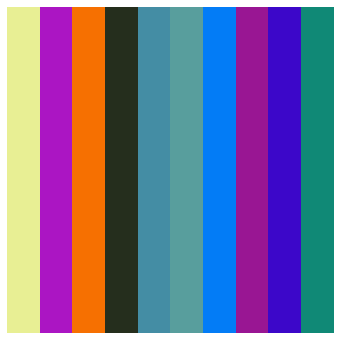

File 2: please allow time for loading
Repetitions:  20000


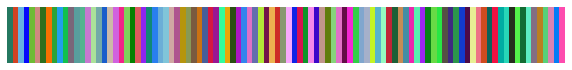

File 3: please allow time for loading
Repetitions:  40000


In [7]:
for i in range(3):#range set to 3 by default
    if i == 0:
        print('File 1: please allow time for loading')
        accuracy = 4.5# variable hold the value used to determine once an evaluation is good enough
        ncolours, colours = read_data("col10.txt")
        main(colours,accuracy,5000)
    elif i == 1:
        print('File 2: please allow time for loading')
        accuracy = 50# variable hold the value used to determine once an evaluation is good enough
        ncolours, colours = read_data("col100.txt")
        main(colours,accuracy,20000)
    else:
        print('File 3: please allow time for loading')
        accuracy = 300# variable hold the value used to determine once an evaluation is good enough
        ncolours, colours = read_data("col500.txt")
        main(colours,accuracy,40000)

This method initially was designed to provide a random order when the getNewOrder method was called. This created the issue of taking too long to generate a correct output of colours as the program compares the best solution with the generated one, when many colours exist like 500 this can take some time. To sort this I changed the getNewOrder method to return a version of the order where two elements have been swapped instead. This program also requires a maximum repetitions value which when met can break out that loop and provide the bets found solution.